In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from utils import generate_features, define_holidays

In [2]:
with open('model.pkl', 'rb') as f:
    model_bytes = f.read()

model = pickle.loads(model_bytes)

In [3]:
df_validate = pd.read_csv('data/df_future.csv', index_col=0)
df_validate = df_validate.sort_values(by='date')
df_validate = df_validate.drop('sales_quantity', axis=1)
dates_for_plot = df_validate['date']
df_validate

,date,category_id,sku_id,sales_price
0,2020-11-01,7,1045,284.700
5544,2020-11-01,17,605572,62.322
1148,2020-11-01,7,49020,388.700
11284,2020-11-01,7,840709,61.022
5558,2020-11-01,17,605573,62.322
...,...,...,...,...
7027,2020-11-14,7,701851,304.200
7013,2020-11-14,23,701214,48.607
6999,2020-11-14,17,700395,55.250
7125,2020-11-14,17,702121,62.322


In [4]:
df_validate = generate_features(df_validate)
df_validate = define_holidays(df_validate)
df_validate

,holidays,date,sku_id,sales_price,year,month,day,day_of_year,day_of_week,is_weekend,category_1,category_2,category_3,growing_sum_sales_price
0,0,2020-11-01,1045,284.700,2020,11,1,306,6,True,1,0,0,284.700
1,0,2020-11-01,605572,62.322,2020,11,1,306,6,True,0,1,0,62.322
2,0,2020-11-01,49020,388.700,2020,11,1,306,6,True,1,0,0,388.700
3,0,2020-11-01,840709,61.022,2020,11,1,306,6,True,1,0,0,61.022
4,0,2020-11-01,605573,62.322,2020,11,1,306,6,True,0,1,0,62.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11363,0,2020-11-14,701851,304.200,2020,11,14,319,5,False,1,0,0,3400.800
11364,0,2020-11-14,701214,48.607,2020,11,14,319,5,False,0,0,1,680.498
11365,0,2020-11-14,700395,55.250,2020,11,14,319,5,False,0,1,0,768.300
11366,0,2020-11-14,702121,62.322,2020,11,14,319,5,False,0,1,0,868.608


In [5]:
df_validate['sales_quantity'] = model.predict(df_validate.drop('date', axis=1))
df_validate

,holidays,date,sku_id,sales_price,year,month,day,day_of_year,day_of_week,is_weekend,category_1,category_2,category_3,growing_sum_sales_price,sales_quantity
0,0,2020-11-01,1045,284.700,2020,11,1,306,6,True,1,0,0,284.700,1.508364
1,0,2020-11-01,605572,62.322,2020,11,1,306,6,True,0,1,0,62.322,2.627566
2,0,2020-11-01,49020,388.700,2020,11,1,306,6,True,1,0,0,388.700,1.292325
3,0,2020-11-01,840709,61.022,2020,11,1,306,6,True,1,0,0,61.022,2.690139
4,0,2020-11-01,605573,62.322,2020,11,1,306,6,True,0,1,0,62.322,2.627566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11363,0,2020-11-14,701851,304.200,2020,11,14,319,5,False,1,0,0,3400.800,1.583273
11364,0,2020-11-14,701214,48.607,2020,11,14,319,5,False,0,0,1,680.498,4.475386
11365,0,2020-11-14,700395,55.250,2020,11,14,319,5,False,0,1,0,768.300,2.024356
11366,0,2020-11-14,702121,62.322,2020,11,14,319,5,False,0,1,0,868.608,2.024356


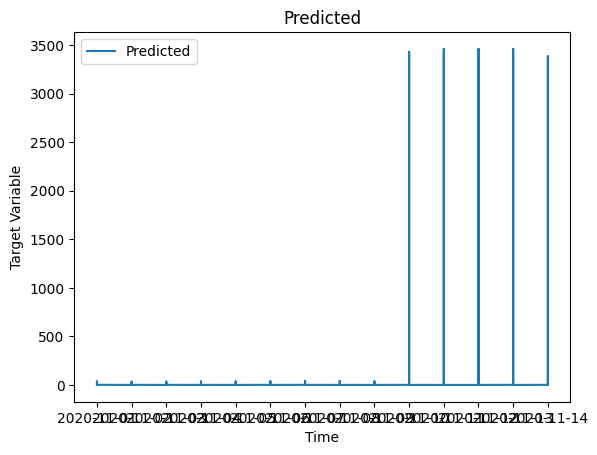

In [6]:
# Visualize predictions
plt.plot(dates_for_plot, df_validate['sales_quantity'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.title('Predicted')
plt.legend()
plt.show()

In [7]:
df_validate.to_csv('data/df_future_predicted.csv')